## Let's look at the myosin alignment between species

In [16]:
import os
import pandas as pd
import pdb
import matplotlib.pyplot as plt
import pdb
import subprocess
import logomaker as lm
import matplotlib.pyplot as plt
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import SeqIO
from enum import Enum

In [17]:
# https://www.rcsb.org/structure/7KOG
coiled_coil_seq_7KOG = 'EEEMRKLEELVATTQAALEKEEKARKEVEALNAKLIQEKTDLLRNLEGEKGSISSIQEKAAKLQAQKSDLESQLMDTQERLQQEEDNRNQMFQQKKKLEQEVGGLKKDIEDLELSLQKSDQDKASKDHQIRNLNDEIAHQDELINKLNKEKKMQGEHTQKTAEELQASEDKVNHLTKVKAKLEQTLDELEDSLEREKKLRGDVEKAKRKVEGDLKLTQEAVADLERNKKELEQTIQRKDKEIASLTAKLEDEQSIVSKTQKQIKELQSRIEELEEEVEAERQARGKAEKQRADLARELEELGERLEEAGGATSAQIELNKKREAEMSKLRRDLEESNIQHESTLANLRKKHNDAVSEMGEQIDQLNKLKTKAEHDRTHVQNDLNNTRHALDQMCREKAATEKIAKQLQHQVNEIQGKLDEANRTLNDFDSAKKKLSIENSDLLRQLEEAESQVSQLSKIKVSLTTQLEDTKRLADEEARERATLLGKFRNLEHDLDNIREQLEEEAEGKADIQRQLSKANAEAQLWRTKYESEGVARAEELEEAKRKLQARLAEAEETIESLNQKVIALEKTKQRLATEVEDLQLEVDRATAIANAAEKKAKAIDKIIGEWKLKVDDLAAELDASQKECRNYSTELFRLKGAYEEAQEQLEAVRRENKNLADEVKDLLDQIGEGGRNIHEIEKQKKRLEVEKDELQAALEEAEAALEQEENKVLRSQLELSQVRQEIDRRIQEKEEEFENTRKNHQRALDSMQASLEAEAKGKAEALRMKKKLEADINELEIALDHANKANSEAQKTIKKYQQQLKDVQTALEEEQRARDDAREQLGISERRANALQNELEESRTLLEQADRGRRQAEQELGDAHEQINELAAQATSASAAKRKLEGELQTLHADLDELLNEAKNSEEKAKKAMVDAARLADELRAEQDHAQTQEKLRKALETQIKELQIRLDEAETNALKGGKKAIAKLEQRVRELENELDGEQRRHADAQKNLRKSERRIKELSFQADEDRKNHERMQDLVDKLQQKIKTYKRQIEEAEEIAALNLAKFRKAQQELEEAEERADLAEQAIAKFRT'

In [101]:
myosin_df = pd.read_csv('myosin2_comparisons.csv', comment='#')
myosin_df

,species_protein,uniprot_id,sequence
0,rabbit_myh2,G1SJQ4,MSADSEMAVFGEAAPYLRKSEKERIEAQNRPFDAKTSVFVAEPKES...
1,giant_water_bug_myh2,pdb_7KOG,MPGSKPTKTEEEDDPTPYLFVSLEQKRIDQTKPYDAKKACWVPDEH...


In [77]:
# Let's take a look only at the long myosins!

myosin_df['protein_len'] = myosin_df['sequence'].apply(lambda x: len(x))
myosin_df = myosin_df[myosin_df['protein_len'] > 1900]

In [86]:
# Download the muscle binary https://drive5.com/muscle/downloads_v3.htm
MUSCLE_ALIGN_CALL = (
    "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/muscle3.8.31_i86darwin64"
)


# Giving this a very very high penalty here for opening gaps!
def muscle_align(
    seqs,
    seq_record_name="_example.fasta",
    align_name="_align.fasta",
    gap_open_penalty=-10,
    gap_extension_penalty=-5,
    maxiters=10,
):
    SeqIO.write(
        [SeqRecord(Seq(seq), id=seq) for seq in seqs],
        seq_record_name,
        "fasta",
    )

    muscle_command = f"{MUSCLE_ALIGN_CALL} -in {seq_record_name} -out {align_name} -maxiters {maxiters} -gapopen {gap_open_penalty} -gapextend {gap_extension_penalty}"
    subprocess.call(
        muscle_command,
        shell=True,
    )
    with open(align_name, "r") as f:
        raw_lines = f.readlines()

    aligned_seqs = []
    aligned_protein_seq = ""
    for line in raw_lines:
        if ">" in line:
            # We are at the beginning of a new protein
            if aligned_protein_seq != "":
                aligned_seqs.append(aligned_protein_seq)
            aligned_protein_seq = ""
        elif "#" in line:
            continue
        else:
            aligned_protein_seq += line.strip()
    aligned_seqs.append(aligned_protein_seq)
    return aligned_seqs

In [87]:
def save_web_logo_alignment(
    seqs,
    web_logo_name,
    axis,
    to_type="information",#"counts",
    title="",
):
    counts_mat = lm.alignment_to_matrix(seqs, to_type=to_type)

    if not counts_mat.empty:  # Check if counts_mat is not empty
        logo = lm.Logo(counts_mat, ax=axis, color_scheme="hydrophobicity")

        # axis.set_xlabel("Alignment Position")
        if to_type == "information":
            axis.set_ylabel("Information (Bits)")
        elif to_type == "counts":
            axis.set_ylabel("Residue Positional Counts")
        axis.set_title(title)

    # Save only if needed
    if web_logo_name and web_logo_name != "tmp":
        plt.savefig(web_logo_name)
    
    return counts_mat

In [102]:
aligned_seqs = muscle_align(list(myosin_df['sequence']))# , gap_open_penalty=1, gap_extension_penalty=1)
counts_mat = lm.alignment_to_matrix(aligned_seqs, to_type='information')
print(len(aligned_seqs[0]))
aligned_seqs

1973



MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

_example 2 seqs, max length 1971, avg  length 1956
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00      9 MB(0%)  Iter   1  100.00%  Align node       
00:00:00      9 MB(0%)  Iter   1  100.00%  Root alignment


['--MSADSEMAVFGEAAPYLRKSEKERIEAQNRPFDAKTSVFVAEPKESFVKGTIQSREAGKVTVKTEAGATLTVKDDQVFPMNPPKYDKIEDMAMMTHLHEPAVLYNLKERYAAWMIYTYSGLFCVTVNPYKWLPVYNPEVVTAYRGKKRQEAPPHIFSISDNAYQFMLTDRENQSILITGESGAGKTVNTKRVIQYFATIAVTGDKKKEEATSGKMQGTLEDQIISANPLLEAFGNAKTVRNDNSSRFGKFIRIHFGTTGKLASADIETYLLEKSRVTFQLKAERSYHIFYQITSNKKPELIEMLLITTNPYDYPFVSQGEISVASIDDQEELMATDSAIDILGFTNEEKVSIYKLTGAVMHYGNMKFKQKQREEQAEPDGTEVADKAAYLQGLNSADLLKALCYPRVKVGNEFVTKGQTVEQVTNAVGALAKAVYEKMFLWMVTRINQQLDTKQPRQYFIGVLDIAGFEIFDFNSLEQLCINFTNEKLQQFFNHHMFVLEQEEYKKEGIEWTFIDFGMDLAACIELIEKPMGIFSILEEECMFPKATDTSFKNKLYDQHLGKSANFQKPKVVK-GKVEAHFSLIHYAGVVDYNITGWLEKNKDPLNETVVGLYQKSSLKTLAFLFSGAQTAEAGNASGGAKKGGK-KKGSSFQTVSALFRENLNKLMTNLRSTHPHFVRCIIPNETKTPGAMEHELVLHQLRCNGVLEGIRICRKGFPSRILYADFKQRYKVLNASAIPEGQYIDSKKASEKLLGSIDIDHTQYKFGHTKVFFKAGLLGLLEEMRDDKLAQLITRTQAMCRGFLARVEYQKMVERRESIFCIQYNIRAFMNVKHWPWMKLFFKIKPLLKSAETEKEMATMKEEFQKTKDELAKSEAKRKELEEKMVTLLKEKNDLQLQVQAVTEGLADAEERCDQLIKTKIQLEAKIKEVTERAEDEEEINAELTAKKRKLEDECSELKKDIDDLELTLAKVEKEKHATENKVKNLTEEMAGLDET


MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

_example 2 seqs, max length 1971, avg  length 1956
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00      1 MB(0%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00      9 MB(0%)  Iter   1  100.00%  Align node       
00:00:00      9 MB(0%)  Iter   1  100.00%  Root alignment


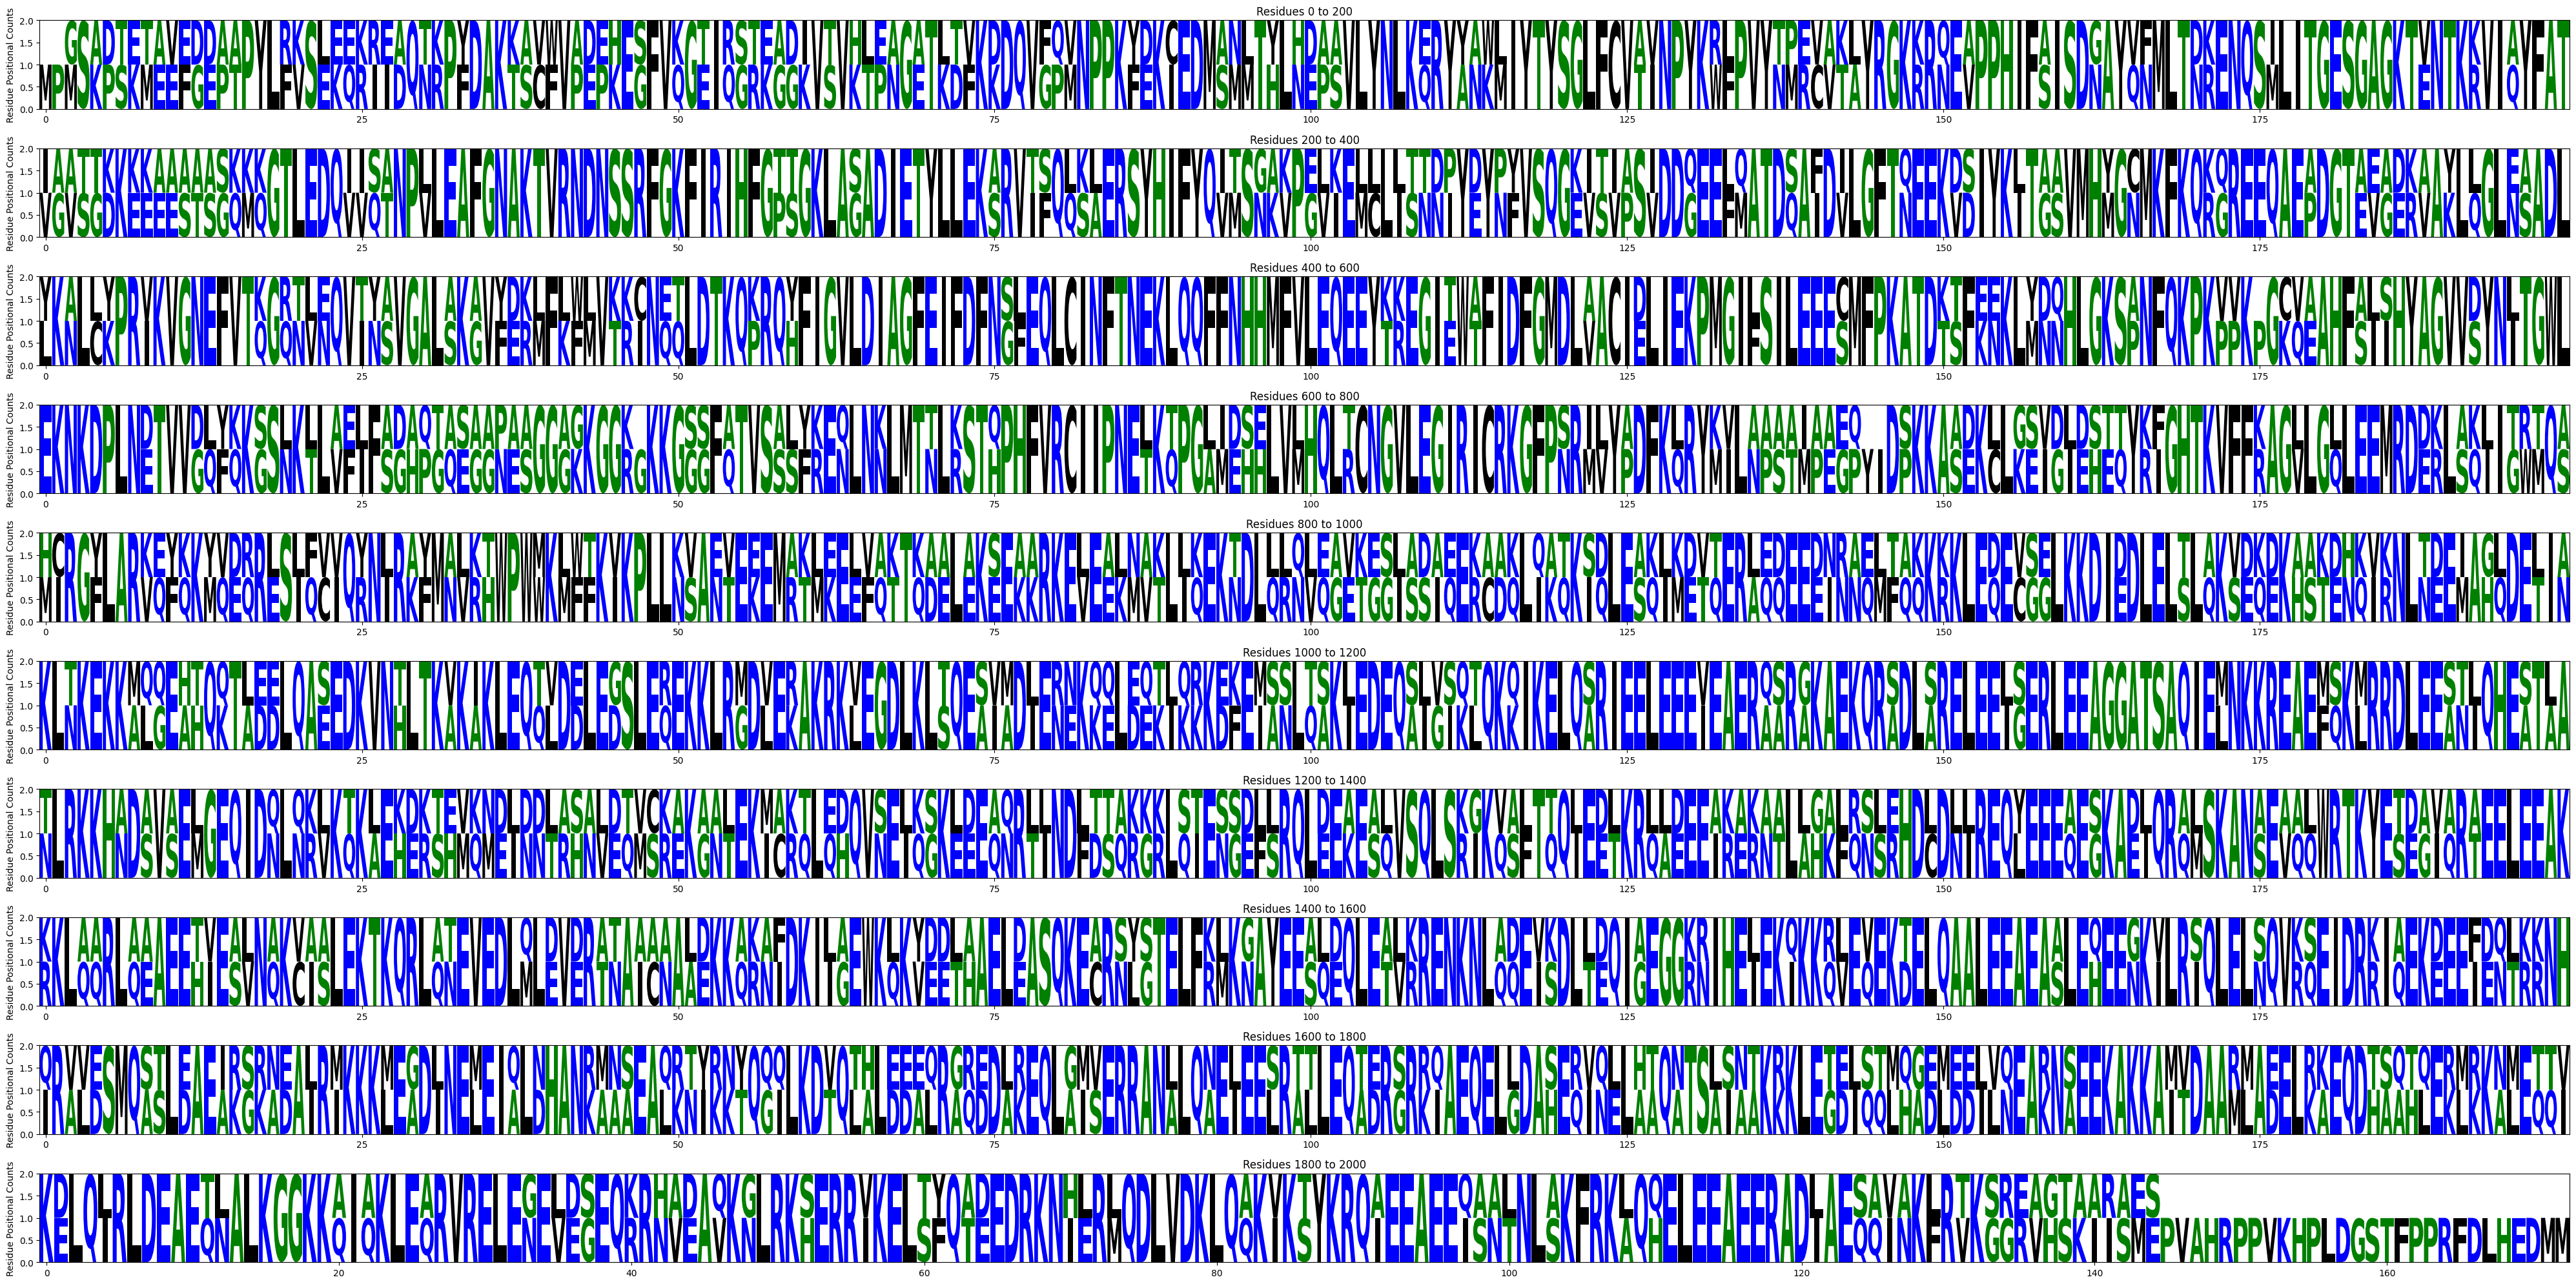

In [84]:
def plot_alignment_in_rows(
    seqs, 
    row_width,
    to_type="counts", #"information",
):
    aligned_seqs = muscle_align(seqs)
    counts_mat = lm.alignment_to_matrix(aligned_seqs, to_type=to_type)

    num_rows = (len(aligned_seqs[0]) - 1) // row_width + 1
    fig, axes = plt.subplots(num_rows, 1, figsize=(40, 2 * num_rows))
    if num_rows == 1:
        axes = [axes]

    for i, ax in enumerate(axes):
        start = i * row_width
        end = start + row_width
        segment_seqs = [seq[start:end] for seq in aligned_seqs]
        save_web_logo_alignment(
            seqs=segment_seqs, 
            web_logo_name=None, 
            axis=ax, 
            title=f'Residues {row_width * (i)} to {row_width * (i+1)}',
            to_type=to_type,
        )

    plt.tight_layout()
    plt.show()
    return counts_mat

counts_mat = plot_alignment_in_rows(list(myosin_df['sequence']), row_width = 200)


# Let's try Myosin-11 from gallus gallus
https://www.rcsb.org/sequence/8SYF 

In [24]:
# first_100_amino_acids = myosin_df[myosin_df['species_protein'] == 'giant_water_bug_myh2']['sequence'].to_list()[0][:150]
# first_100_amino_acids
# chicken_alignment = [seq for seq in aligned_seqs if first_100_amino_acids in seq][0]

# homology_scores = counts_mat.max(axis=1)
# chicken_scores = [(counts_mat.iloc[idx][char], char) for idx, char in enumerate(chicken_alignment) if char != '-']
# print(chicken_scores)
# chicken_alignment

# import matplotlib.pyplot as plt

# plt.figure(figsize=(20, 4)) 
# plt.bar(x=list(range(len(chicken_scores))), height=[score for score, char in chicken_scores])
# plt.title("Chicken Myosin 11 Homology Heatmap (aka how accepted is the Turkey residues)")
# plt.ylabel("Homology score for residue position")
# plt.xlabel("Residue #")


In [66]:
waterbug_alignment = myosin_df[myosin_df['species_protein'] == 'giant_water_bug_myh2']['sequence'].to_list()[0]
coiled_coil_start_idx = waterbug_alignment.find(coiled_coil_seq_7KOG[:10])
coiled_coil_end_idx = waterbug_alignment.find(coiled_coil_seq_7KOG[-10:]) + 10
coiled_coil_end_idx
waterbug_coiled_coil_alignment = waterbug_alignment[coiled_coil_start_idx:coiled_coil_end_idx]

In [72]:
rabbit_alignment = myosin_df[myosin_df['species_protein'] == 'rabbit_myh2']['sequence'].to_list()[0]
coiled_coil_rabbit_alignment = rabbit_alignment[coiled_coil_start_idx:coiled_coil_end_idx]
coiled_coil_rabbit_alignment

'EMATMKEEFQKTKDELAKSEAKRKELEEKMVTLLKEKNDLQLQVQAVTEGLADAEERCDQLIKTKIQLEAKIKEVTERAEDEEEINAELTAKKRKLEDECSELKKDIDDLELTLAKVEKEKHATENKVKNLTEEMAGLDETIAKLTKEKKALQEAHQQTLDDLQAEEDKVNTLTKAKIKLEQQVDDLEGSLEQEKKLRMDLERAKRKLEGDLKLSQESIMDIENEKQQLDEKLKKKEFEMSNLQSKIEDEQALGIQLQKKIKELQARIEELEEEIEAERASRAKAEKQRSDLSRELEEISERLEEAGGATSAQIEMNKKREAEFQKMRRDLEEATLQHEATAATLRKKHADSVAELGEQIDNLQRVKQKLEKEKSEMKMEIDDLASNVETVSKAKGNLEKMCRTLEDQVSELKSKEEEQQRLINDLTTQRGRLQTESGEFSRQLDEKEALVSQLSRGKQAFTQQIEELKRQLEEEIKAKNALAHALQSSRHDCDLLREQYEEEQESKAELQRAMSKANSEVAQWRTKYETDAIQRTEELEEAKKKLAQRLQAAEEHVEAVNAKCASLEKTKQRLQNEVEDLMLDVERTNAACAALDKKQRNFDKILAEWKQKYEETHAELEASQKEARSLGTELFKMKNAYEESLDQLETLKRENKNLQQEISDLTEQIAEGGKRIHELEKIKKQVEQEKTELQAALEEAEASLEHEEGKILRIQLELNQVKSEIDRKIAEKDEEIDQLKRNHIRVVESMQSTLDAEIRSRNDAIRIKKKMEGDLNEMEIQLNHANRMAAEALRNYRNTQGILKDTQLHLDDALRGQEDLKEQLAMVERRANLLQAEIEELRATLEQTERSRKIAEQELLDASERVQLLHTQNTSLINTKKKLETDISQMQGEMEDIVQEARNAEEKAKKAITDAAMMAEELKKEQDTSAHLERMKKNMEQTVKDLQLRLDEAEQLALKGGKKQIQKLEARVRELEGEVESEQKRNVEAVKGLRKHERR

In [52]:
# coiled_coil_alignment = (
#     "".join(
#         [
#             "-"
#             for _ in range(len(waterbug_coiled_coil_alignment[:coiled_coil_start_idx]))
#         ]
#     )
#     + waterbug_coiled_coil_alignment[coiled_coil_start_idx:coiled_coil_end_idx]
#     + "".join(
#         ["-" for _ in range(len(waterbug_coiled_coil_alignment[coiled_coil_end_idx:]))]
#     )
# )

# coiled_coil_alignment

In [73]:
# We focus to the coiled coil start & end indices
focused_counts_mat = counts_mat[coiled_coil_start_idx:coiled_coil_end_idx]

homology_scores = focused_counts_mat.max(axis=1)
waterbug_coiled_coil_scores = [(focused_counts_mat.iloc[idx][char], char) for idx, char in enumerate(waterbug_coiled_coil_alignment) if char != '-']
print(waterbug_coiled_coil_scores)


[(0.02544802331713815, 'E'), (0.02688043841050715, 'M'), (0.03258578274769222, 'A'), (0.030521126224966777, 'T'), (0.030521126224966777, 'M'), (0.030521126224966777, 'K'), (0.026490517180050813, 'E'), (0.027523575031290482, 'E'), (0.03052112622496679, 'F'), (0.026490517180050816, 'Q'), (0.022991986384202478, 'K'), (0.030521126224966798, 'T'), (0.5779950756571001, 'K'), (0.030521126224966798, 'D'), (0.030521126224966777, 'E'), (0.026490517180050823, 'L'), (0.04516039863907318, 'A'), (0.05376087682101429, 'K'), (0.02649051718005081, 'S'), (0.7019859031742363, 'E'), (0.028488879644754633, 'A'), (0.05298103436010163, 'K'), (0.022580199319536597, 'R'), (0.5644892066206502, 'K'), (0.026880438410507156, 'E'), (0.028488879644754616, 'L'), (0.16384435667914138, 'E'), (0.43684774129984716, 'E'), (0.05697775928950924, 'K'), (0.02491757478416071, 'M'), (0.030521126224966777, 'V'), (0.024917574784160703, 'T'), (0.030521126224966798, 'L'), (0.026490517180050823, 'L'), (0.49835149568321396, 'K'), (0.

In [69]:
def get_consensus_sequence(row):
    max_col_index = row.idxmax()  # Get index of max value in the row
    return max_col_index

# Apply the function to each row and join the results into a string
consensus_sequence = focused_counts_mat.apply(get_consensus_sequence, axis=1).values.tolist()
consensus_sequence_str = ''.join(consensus_sequence)
print(consensus_sequence_str)
focused_counts_mat


KIKPLLKSAETEKEMATMKEEFQKTKDELAKSEAKRKELEEKMVSLLKEKNDLQLQVQAEAEGLADAEERCDQNHRLINDLIKTKIQLEAKIKEVTERAEDEEEINAELTAKKRKLEDECSELKKDIDDLELTLAKVEKEKHATENKVKNLTEEMAGLDETIAKLTKEKKALQEAHQQTLDDLQAEEIDKVNTLTKAKIKLEQQVDDLEGSLEQEKKLRMDLERAKRKLEGEVEDLMMDLKLAQESIMDIENEKQQLDEKLKKKEFEISNLQSKIEDEQALGIQLQKKIKELQARIEELEREEIEAERASRAKAEKQRSDLSRELEEISERLEEAGGATSAQIEMNKKREAEFQKMRRDLETENGELYRQLEATLQHEATAATLRKKHADSVAELGEQIDNLQRVKQKLEKEKSEMKMEIDDLASNVETVSKAKGNLEKMCRTLEDQVSELKSKYEEEQQRLINDLTTQRGRLQTESGEFSRQLDEKEALVSQLSRGKQAFTQQIEELKRQLEEEIAAAAILDKKQRNFDKAKNALAHALQSSRHDCDLLREQYEEEQESKAELQRALSKANSEVAQWRTKYETDAIQRTEELEEAKKKLAQRLQAAEEHVEAVNAKCASLEKTKQRLQNEVEDLMLDVERTNAACAALDKKQRNFDKILAEWKQKYEETHAELEASQKEARSLGTELFKMKNAYEESLDQLETLKRENKNLQQEISDLTEQIAEGGKRIHELEKIKKQVEQEKSELQAALEEAEASLEHEEGKILRIQLELNQVKSEIDRKIAEKDEEIDQLKRNHIRVVESMQSTLDAEIRSRNDAIRLKKKMEGDLNEMEIQLNHANRMAAEALRNYRNTQGILKDTQLHLDDALRGQEDLKEQLAMVERRANLLQAEIEELRATLEQTERSRKIAEQELLDASERVQLLHTQNTSLINTKKKLETDISQIQGEMEDIVQEARNAEEKAKKAITDAAMMAEELKKEQDTSAHLERMKKNMEQTVKDL

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,X,Y
pos,,,,,,,,,,,,,,,,,,,,,
853,0.025448,0.025448,0.025448,0.025448,0.025448,0.025448,0.025448,0.025448,0.483512,0.025448,...,0.025448,0.025448,0.025448,0.152688,0.025448,0.025448,0.025448,0.025448,0.025448,0.025448
854,0.026880,0.026880,0.026880,0.026880,0.026880,0.026880,0.026880,0.564489,0.053761,0.026880,...,0.026880,0.026880,0.026880,0.026880,0.026880,0.026880,0.080641,0.026880,0.026880,0.026880
855,0.032586,0.032586,0.032586,0.032586,0.032586,0.032586,0.032586,0.032586,0.782059,0.032586,...,0.032586,0.032586,0.032586,0.032586,0.032586,0.032586,0.032586,0.032586,0.032586,0.032586
856,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,0.061042,0.030521,0.030521,0.030521,...,0.030521,0.701986,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521
857,0.061042,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,0.701986,...,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,0.030521,0.030521,0.701986,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,...,0.030521,0.030521,0.030521,0.030521,0.061042,0.030521,0.030521,0.030521,0.030521,0.030521
1926,0.028879,0.028879,0.028879,0.028879,0.028879,0.028879,0.028879,0.028879,0.028879,0.635334,...,0.028879,0.028879,0.086636,0.028879,0.028879,0.028879,0.028879,0.028879,0.028879,0.028879
1927,0.061042,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,...,0.030521,0.030521,0.030521,0.030521,0.030521,0.030521,0.701986,0.030521,0.030521,0.030521


Text(0.5, 0, 'Residue #')

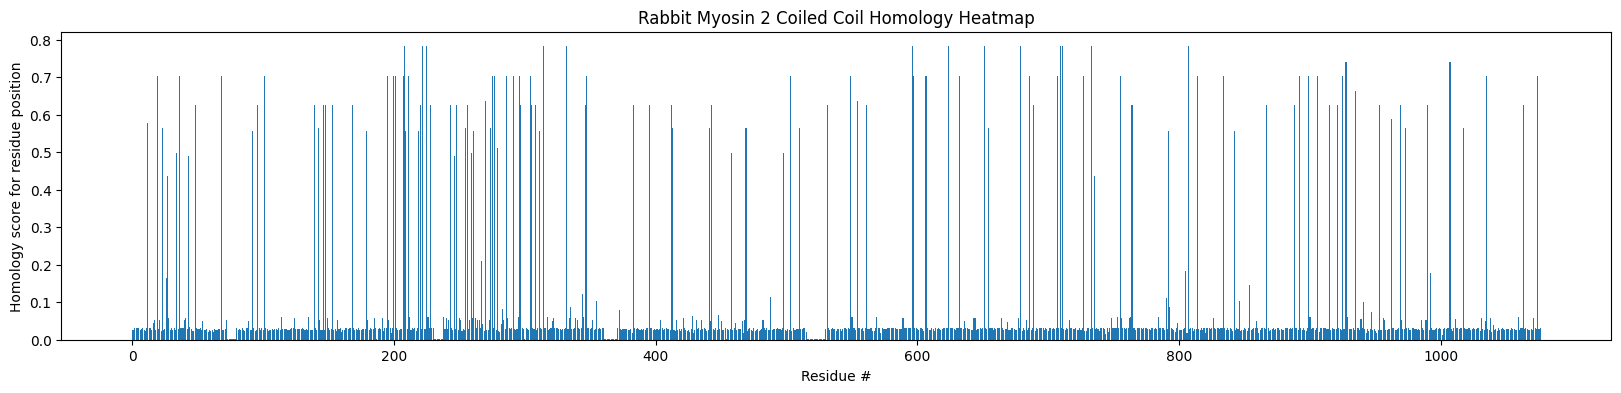

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4)) 
plt.bar(x=list(range(len(waterbug_coiled_coil_scores))), height=[score for score, char in waterbug_coiled_coil_scores])
plt.title("Rabbit Myosin 2 Coiled Coil Homology Heatmap")
plt.ylabel("Homology score for residue position")
plt.xlabel("Residue #")


In [55]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Bar(x=list(range(len(waterbug_coiled_coil_scores))), y=[score for score, char in waterbug_coiled_coil_scores]))
fig.update_layout(
    title="Chicken Myosin 11 Homology Heatmap (aka how accepted is the Turkey residues)",
    xaxis_title="Residue #",
    yaxis_title="Homology score for residue position",
    autosize=False,
    width=2000,  # Adjust the width to your preference
    height=400   # Adjust the height to your preference
)

# Show the plot
fig.show()


# Okay let's paint the scores onto a turkey Myosin 2~!

Using this pdb structure of Turkey Myosin-2 https://www.rcsb.org/3d-view/6XE9 

In [ ]:
myosin_df[myosin_df['species_protein'] == 'turkey']
aligned_seqs

['-MSQKPLSD--DEKFLFVDKNFVNNPLAQADWSAKKLVWVPSEKHGFEAASIKEEKGDEVTVELQENGKKVTLSKDDIQKMNPPKFSKVEDMAELTCLNEASVLHNLRERYFSGLIYTYSGLFCVVVNPYKQLPIYSEKIIDMYKGKKRHEMPPHIYAIADTAYRSMLQD-----------------------------------------REDQSILCTGESGAGKTENTKKVIQYLAVVASSHKGKKDTSITQGPSFSYGELEKQLLQANPILEAFGNAKTVKNDNSSRFGKFIRINFDVTGYIVGANIETYLLEKSRAIRQAKDERTFHIFYYLIAGASEQMRNDLLLE-GFNNYTFLSNGHVPIPAQQDDEMFQETLEAMRIMGFTEEEQTSILRVVSSVLQLGNIVFKKERNTDQASMPDNT------AAQKVCHLMGINVTDFTRSILTPRIKVGRDVVQKAQTKEQADFAIEALAKAKFERLFRWILTRVNKALDKTKRQGASFLGILDIAGFEIFEINSFEQLCINYTNEKLQQLFNHTMFILEQEEYQREGIEWNFIDFGLDLQPCIELIERPTNPPGVLALLDEECWFPKATDTSFVEKLIQEQGNHPKFQKSKQLKDKTEFCILHYAGKVSYNASAWLTKNMDPLNDNVTSLLNQSSDKFVADLWKDVDRIVGLDQMAKMTESSLPSSSKTKKGMFRTVGQLYKEQLTKLMTTLRNTNPNFVRCIIPNHEKRAGKLDAHLVLEQLRCNGVLEGIRICRQGFPNRIVFQEFRQRYEILAANAIPKG-FMDGKQACILMIKALELDPNLYRIGQSKIFFRTGVLAHLEEERDLKITDVIIAFQAQCRGYLARKAFAKRQQQLTAMKVIQRNCAAYLKLRNWQWWRLFTKVKPLLQVTRQEEEMQAKDEELQRTKERQQKAEAELKELEQKHTQLCEEKNLLQEKLQAETELYAEAEEMRVRLAAKKQELEEILHEMEARIEEEEERSQQ

In [ ]:
PDB_ID = '6XE9'

# Not valid since the muscle call seems to shuffle up the order of sequences
# turkey_alignment = aligned_seqs[myosin_df[myosin_df['species_protein'] == 'turkey'].index[0]]

first_100_amino_acids = myosin_df[myosin_df['species_protein'] == 'turkey_myh2']['sequence'].to_list()[0][:150]
turkey_alignment = [seq for seq in aligned_seqs if first_100_amino_acids in seq][0]

homology_scores = counts_mat.max(axis=1)
# turkey_scores = [homology_scores[idx] for idx, char in enumerate(turkey_alignment) if char != '-']
turkey_scores = [(counts_mat.iloc[idx][char], char) for idx, char in enumerate(turkey_alignment) if char != '-']
print(turkey_scores)
turkey_alignment

[(0.04995646592902759, 'M'), (0.08707189405293463, 'S'), (0.3335324889843512, 'Q'), (0.08707189405293467, 'K'), (0.07748031008320509, 'P'), (0.07806322525375108, 'L'), (0.05493997274525731, 'S'), (0.08774546879001925, 'D'), (0.0926768540738563, 'D'), (0.8874595941623329, 'E'), (0.09267685407385622, 'K'), (0.09267685407385622, 'F'), (0.08774546879001939, 'L'), (0.21146819265967953, 'F'), (0.09267685407385631, 'V'), (0.09267685407385648, 'D'), (1.0523383444975272, 'K'), (0.09267685407385648, 'N'), (0.09267685407385623, 'F'), (0.07748031008320508, 'V'), (0.09267685407385623, 'N'), (0.0926768540738564, 'N'), (0.08374421416829406, 'P'), (0.083744214168294, 'L'), (1.0523383444975256, 'A'), (1.0523383444975285, 'Q'), (0.08287352500778272, 'A'), (0.07038187268393557, 'D'), (0.0877454687900194, 'W'), (0.0926768540738563, 'S'), (0.09267685407385623, 'A'), (0.08774546879001924, 'K'), (0.9679494116427444, 'K'), (0.07094404110800662, 'L'), (0.0789339144142628, 'V'), (0.08374421416829425, 'W'), (0.0

'---MSQKPLSDDEKFLFVDKNFVNNPLAQADWSAKKLVWVPSEKHGFEAASIKEEKGDEVTVELQENGKKVTLSKDDIQKMNPPKFSKVEDMAELTCLNEASVLHNLRERYFSGLIYTYSGLFCVVVNPYKQLPIYSEKIIDMYKGKKRHEMPPHIYAIADTAYRSMLQD-----------------------------------------REDQSILCTGESGAGKTENTKKVIQYLAVVASSHKGKKDTSITQGPSFSYGELEKQLLQANPILEAFGNAKTVKNDNSSRFGKFIRINFDVTGYIVGANIETYLLEKSRAIRQAKDERTFHIFYYLIAGASEQMRNDLLL-EGFNNYTFLSNGHVPIPAQQDDEMFQETLEAMRIMGFTEEEQTSILRVVSSVLQLGNIVFKKERNTDQASMPDNTAAQKVCHLMGINVTDFTRSILTPRIKVGRDVVQKAQTKEQADFAIEALAKAKFERLFRWILTRVNKALDKTKRQGASFLGILDIAGFEIFEINSFEQLCINYTNEKLQQLFNHTMFILEQEEYQREGIEWNFIDFGLDLQPCIELIERPTNPPGVLALLDEECWFPKATDTSFVEKLIQEQGNHPKFQKSKQLKDKTEFCILHYAGKVSYNASAWLTKNMDPLNDNVTSLLNQSSDKFVADLWKDVDRIVGLDQMAKMTESSLPSSSKTKKGMFRTVGQLYKEQLTKLMTTLRNTNPNFVRCIIPNHEKRAGKLDAHLVLEQLRCNGVLEGIRICRQGFPNRIVFQEFRQRYEILAANAIPKG-FMDGKQACILMIKALELDPNLYRIGQSKIFFRTGVLAHLEEERDLKITDVIIAFQAQCRGYLARKAFAKRQQQLTAMKVIQRNCAAYLKLRNWQWWRLFTKVKPLLQVTRQEEEMQAKDEELQRTKERQQKAEAELKELEQKHTQLCEEKNLLQEKLQAETELYAEAEEMRVRLAAKKQELEEILHEMEARIEEEEERSQQLQAEKKK

Text(0.5, 0, 'Residue #')

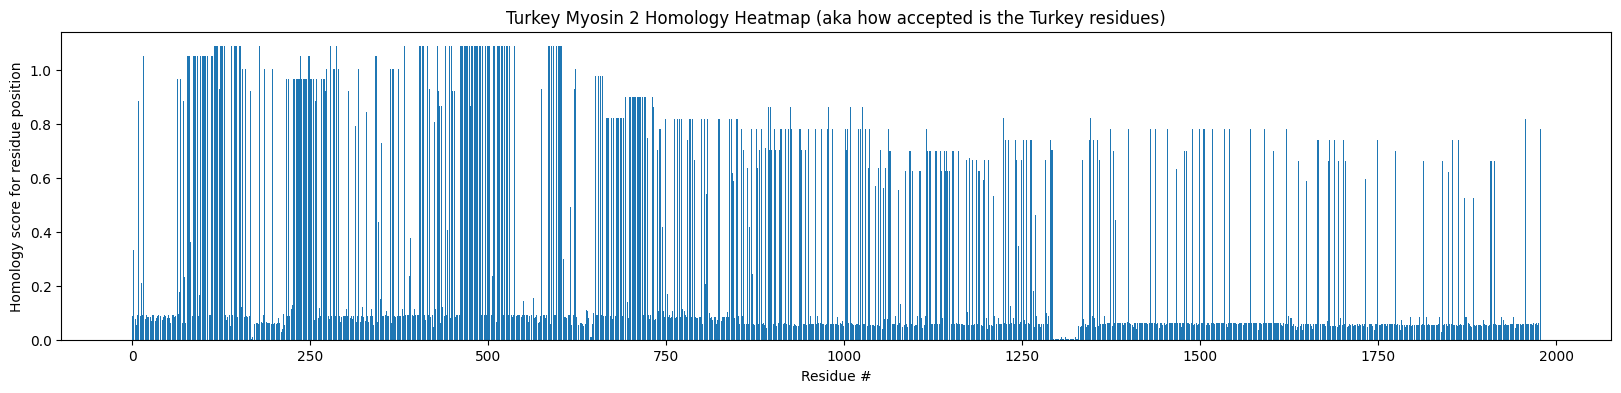

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4)) 
plt.bar(x=list(range(len(turkey_scores))), height=[score for score, char in turkey_scores])
plt.title("Turkey Myosin 2 Homology Heatmap (aka how accepted is the Turkey residues)")
plt.ylabel("Homology score for residue position")
plt.xlabel("Residue #")


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Bar(x=list(range(len(turkey_scores))), y=[score for score, char in turkey_scores]))
fig.update_layout(
    title="Turkey Myosin 2 Homology Heatmap (aka how accepted is the Turkey residues)",
    xaxis_title="Residue #",
    yaxis_title="Homology score for residue position",
    autosize=False,
    width=2000,  # Adjust the width to your preference
    height=400   # Adjust the height to your preference
)

# Show the plot
fig.show()


In [ ]:
range_of_interest_1 = turkey_scores[112:130] # Oops these are buried residues! 
print(''.join([tup[1] for tup in range_of_interest_1]))
range_of_interest_2 = turkey_scores[226:254]
print(''.join([tup[1] for tup in range_of_interest_2]))
range_of_interest_3 = turkey_scores[266:275]
print(''.join([tup[1] for tup in range_of_interest_3]))
range_of_interest_4 = turkey_scores[462:471]
print(''.join([tup[1] for tup in range_of_interest_4]))
range_of_interest_5 = turkey_scores[476:505]
print(''.join([tup[1] for tup in range_of_interest_5]))
range_of_interest_6 = turkey_scores[583:607]
print(''.join([tup[1] for tup in range_of_interest_6]))
range_of_interest_7 = turkey_scores[698:725]
print(''.join([tup[1] for tup in range_of_interest_7]))

IYTYSGLFCVVVNPYKQL
ANPILEAFGNAKTVKNDNSSRFGKFIRI
IETYLLEKS
ILDIAGFEI
FEQLCINYTNEKLQQLFNHTMFILEQEEY
LHYAGKVSYNASAWLTKNMDPLND
HLVLEQLRCNGVLEGIRICRQGFPNRI


sublime lookup for hydrophobic: A|I|L|M|F|W|Y|V
sublime lookup for charged: R|H|K|D|E

select range_of_interest_1, chain A and resi 112-130


In [ ]:
turkey_scores[1447:1450]

[(0.05298103436010162, 'L'),
 (0.7019859031742361, 'V'),
 (0.061042252449933596, 'S')]

In [ ]:
import pymol
from pymol import cmd, stored

# Initialize PyMOL
pymol.finish_launching()

# Load your structure
cmd.fetch("6XE9")  # replace with your file or use fetch for PDB ID

# Function to convert a float value to a color on the white to red spectrum
def value_to_color(value):
    return [value, 1.0 - value, 1.0 - value]  # Red intensity increases with value

for i, value in enumerate(turkey_scores, start=1):
    color_name = f"color_{i}"
    cmd.set_color(color_name, value_to_color(value))
    cmd.color(color_name, f"resi {i}")

# Save the session if needed
cmd.save("colored_structure.pse")
cmd.ipython_image()


ModuleNotFoundError: No module named 'pymol'

In [ ]:
from Bio.PDB import PDBList

pdbl = PDBList()
pdbl.retrieve_pdb_file('6XE9', file_format='pdb', pdir='.')


'./pdb6xe9.ent'

Can we use STRIDE for buried residues? https://webclu.bio.wzw.tum.de/cgi-bin/stride/stridecgi.py

In [ ]:
import requests
from bs4 import BeautifulSoup

url = f"https://www.rcsb.org/sequence/{PDB_ID}"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


In [ ]:
soup

<!DOCTYPE html>
<html lang="en"><head><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-5JMGYPWJRR"></script><script>//- global rcsb-config object
var RC = {
      googleAnalyticsTrackingId: 'UA-3923365-3'
    , instance: 'production'
    , isProductionServer: true
    , dataUrl: 'https://data.rcsb.org/'
    , searchUrl: 'https://search.rcsb.org/rcsbsearch/v2/'
    , alignmentUrl: 'https://alignment.rcsb.org/api/v1-beta/'
    , internalAnalyticsOriginHeaderKey: 'Rcsb-Analytics-Traffic-Origin'
    , internalAnalyticsOriginHeaderValue: 'internal'
    , internalAnalyticsStageHeaderKey: 'Rcsb-Analytics-Traffic-Stage'
    , internalAnalyticsStageHeaderValue: 'production'
    , MOLSTAR_IMG_URL: 'https://cdn.rcsb.org/images/structures/'
};
</script><script src="/search/search-data?ts=5674165"></script><script src="/js/search/react-search.js?ts=5674165"></script><script>!function(){if("performance"in window==0&&(window.performance={}),Date.now=Date.now||function(){return(new 

In [ ]:
svg_element = soup.find('rect', id="annotationTrack_HYDROPATHY_RcsbFvBoard_lq0353vh_pane")
svg_element


In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup

# Set up the Selenium WebDriver
driver = webdriver.Chrome()  # Replace with your browser's driver

# Open the URL
driver.get("https://www.rcsb.org/sequence/6XE9")

# Let's wait for the page to load the content (you can adjust the time as needed)
driver.implicitly_wait(100)

# Get the HTML content after JavaScript execution
html_content = driver.page_source

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find the SVG element
svg_element = soup.find('rect', id="annotationTrack_HYDROPATHY_RcsbFvBoard_lq0353vh_pane")

# Close the WebDriver
driver.quit()

# print(svg_element)
soup


<html lang="en"><head><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-5JMGYPWJRR"></script><script>//- global rcsb-config object
var RC = {
      googleAnalyticsTrackingId: 'UA-3923365-3'
    , instance: 'production'
    , isProductionServer: true
    , dataUrl: 'https://data.rcsb.org/'
    , searchUrl: 'https://search.rcsb.org/rcsbsearch/v2/'
    , alignmentUrl: 'https://alignment.rcsb.org/api/v1-beta/'
    , internalAnalyticsOriginHeaderKey: 'Rcsb-Analytics-Traffic-Origin'
    , internalAnalyticsOriginHeaderValue: 'internal'
    , internalAnalyticsStageHeaderKey: 'Rcsb-Analytics-Traffic-Stage'
    , internalAnalyticsStageHeaderValue: 'production'
    , MOLSTAR_IMG_URL: 'https://cdn.rcsb.org/images/structures/'
};
</script><script src="/search/search-data?ts=5674171"></script><script src="/js/search/react-search.js?ts=5674171"></script><script>!function(){if("performance"in window==0&&(window.performance={}),Date.now=Date.now||function(){return(new Date).getTime()}

In [ ]:
soup

<html lang="en"><head><script async="" src="https://www.googletagmanager.com/gtag/js?id=G-5JMGYPWJRR"></script><script>//- global rcsb-config object
var RC = {
      googleAnalyticsTrackingId: 'UA-3923365-3'
    , instance: 'production'
    , isProductionServer: true
    , dataUrl: 'https://data.rcsb.org/'
    , searchUrl: 'https://search.rcsb.org/rcsbsearch/v2/'
    , alignmentUrl: 'https://alignment.rcsb.org/api/v1-beta/'
    , internalAnalyticsOriginHeaderKey: 'Rcsb-Analytics-Traffic-Origin'
    , internalAnalyticsOriginHeaderValue: 'internal'
    , internalAnalyticsStageHeaderKey: 'Rcsb-Analytics-Traffic-Stage'
    , internalAnalyticsStageHeaderValue: 'production'
    , MOLSTAR_IMG_URL: 'https://cdn.rcsb.org/images/structures/'
};
</script><script src="/search/search-data?ts=5674166"></script><script src="/js/search/react-search.js?ts=5674166"></script><script>!function(){if("performance"in window==0&&(window.performance={}),Date.now=Date.now||function(){return(new Date).getTime()}